# 3 - Finding Recency, Frequency, and Monetary Value of Customers

The idea of this notebook is to engineer new features from the dataset created after the data cleaning to answer three major questions about each unique customer:

- *When did each unique customer make his/her last purchase i.e. Recency?
- *How many times did each unique customer make a purchase i.e. Frequency?
- *How much did each unique customer spend in total i.e. Monetary Value?

Also, the goal here is to prepare the data in order to perform customer profiling and segmentation.

- So, as always, let's start import the necessary libraries:

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import warnings as wn

wn.filterwarnings('ignore')

- Next, import the `customer_dataset` from the data cleaning, check the shape, and data types:

In [2]:
path = '/media/renan/HD_RENAN/Data Science/Projetos/Customer Data/customer_dataset.csv'

In [3]:
customer_df = pd.read_csv(path)

In [4]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [5]:
customer_df.shape

(406828, 5)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406828 entries, 0 to 406827
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406828 non-null  int64  
 1   InvoiceNo    406828 non-null  int64  
 2   AmountSpent  406828 non-null  float64
 3   InvoiceDate  406828 non-null  object 
 4   Country      406828 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.5+ MB


- As in the previous notebook, some columns are as objects, so let's change it:


In [7]:
# convert InvoiceDate
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

# convert Country
customer_df['Country'] = customer_df['Country'].astype(str)

## Find Recency of Customers

As a first step, let's find the customers' recency. For that, a new feature must be created in oder to determine the recency of purchase made by each unique customer.

For that, let's take '2011-12-09' as the observation point and calculate the number of days since the last purchase of a customer based on that date.

Let's first sort the dataframe based on `InvoiceDate`:

In [8]:
customer_df.sort_values(by=['InvoiceDate'], inplace=True)

Now, keep only the last row of CustomerID by dropping all rows containing similar CustomerIDs except the last, and assing:

In [11]:
user_df = customer_df.drop_duplicates('CustomerID', keep='last').reset_index(drop=True)

In [12]:
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom


Create the new column `Recency` based on the maximum date '2011-12-09':

In [13]:
user_df['Recency'] = user_df['InvoiceDate'].max() - user_df['InvoiceDate']

In [14]:
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,Recency
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom,373 days 02:57:00
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom,373 days 02:13:00
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands,373 days 01:23:00
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom,373 days 01:05:00
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom,373 days 00:47:00


Now, exctract only the days from the  `Recency` column along with the `CustomerID`:

In [15]:
user_df['Recency'] = user_df['Recency'].dt.days

user_df = user_df[['CustomerID','Recency']]

user_df.head()

,CustomerID,Recency
0,18074,373
1,13747,373
2,12791,373
3,17908,373
4,16583,373


Now let's plot the histogram distribution of all the days using a histogram:

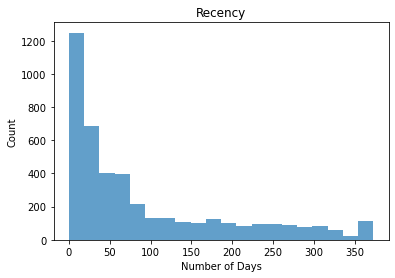

In [27]:
plt.hist(user_df['Recency'], alpha=0.7, bins=20)
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.title('Recency');

As can be seen, most customers have made a purchase within the last 0-50 days, which means that the majority of the customers are active.

## Finding Frequency of Customers

Now, let's see how frequent a customer is. For that, let's engineer a new feature to determine the number of purchases made by each unique customer by counting the number of rows for each unique customer with Pandas `value_counts()` method, and assig to a dataframe:

In [20]:
frequency_df = customer_df['CustomerID'].value_counts().reset_index()
    
frequency_df.columns = ['CustomerID','Frequency']

In [21]:
frequency_df.head()

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


Now, merge the `frequency_df` with `user_df` based on `CustomerID`, and check the first five rows:

In [22]:
user_df = pd.merge(user_df, frequency_df, on='CustomerID')

In [23]:
user_df.head()

,CustomerID,Recency,Frequency
0,18074,373,13
1,13747,373,1
2,12791,373,2
3,17908,373,58
4,16583,373,14


Let's visualize the `Frequency` through a histogram:

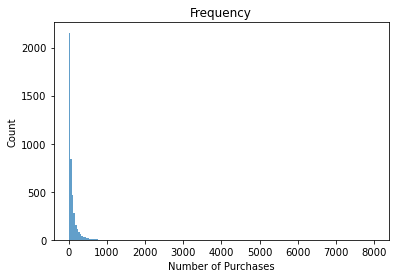

In [29]:
plt.hist(user_df['Frequency'], alpha=0.7, bins=200)
plt.xlabel('Number of Purchases')
plt.ylabel('Count')
plt.title('Frequency');

Since the histogram is no clearly oulining extreme values i.e. outliers, let's make a scatter plot:

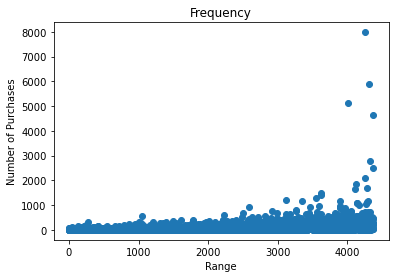

In [31]:
plt.scatter(range(user_df.shape[0]), user_df['Frequency'])
plt.xlabel('Range')
plt.ylabel('Number of Purchases')
plt.title('Frequency');

It can be seen that most customers made purchases between 1-1000 times on the store. Nevertheless, some outlier customers have made more than 1000 purchases.

## Finding Monetary Value of Customers

Finally, let's engineer a new feature `Revenue` that will help us determine the monetary value of purchase made by each unique customer by summing the amount spent by each customer:

In [32]:
amount_df = customer_df.groupby(['CustomerID'])['AmountSpent'].sum().reset_index()

amount_df.rename(columns = {'AmountSpent':'Revenue'}, inplace=True)

In [33]:
amount_df.head()

,CustomerID,Revenue
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


Now, let's merge this dataframe with `user_df` based on `CustomerID`:

In [34]:
user_df = pd.merge(user_df, amount_df, on='CustomerID')

In [35]:
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


Next, let's visualize the frequency distribution through a histogram:

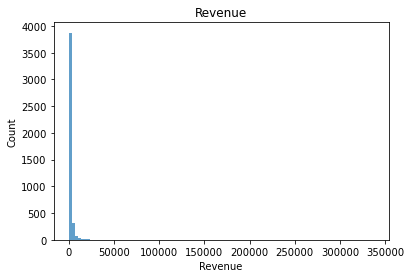

In [37]:
plt.hist(user_df['Revenue'], bins=100, alpha=0.7)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue');

Again, the histogram does not show ouliers, let's make a scatter plot:

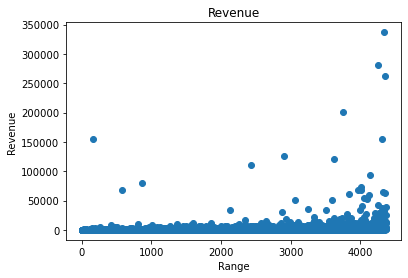

In [38]:
plt.scatter(range(user_df.shape[0]), user_df['Revenue'])
plt.xlabel('Range')
plt.ylabel('Revenue')
plt.title('Revenue');

It can be seen that most customers have made a purchase within 50,000, but there some outliers cases who have made purchases over 50,000.

Lastly, let's save this dataset for future analysis:

In [39]:
user_df.to_csv('/media/renan/HD_RENAN/Data Science/Projetos/Customer Data/user_dataset.csv',
              index=False, header=True)